In [1]:
from sklearn import tree
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df_bp = pd.read_csv("BPTrunc1_train.csv")
df_bp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,6319,Female,79.0,0,0,Yes,Private,Urban,97.93,31.2,NaN,0
1,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,68249,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,NaN,0
3,55232,Female,38.0,0,0,Yes,Private,Rural,79.83,27.9,smokes,0
4,29865,Female,21.0,0,0,No,Private,Rural,89.44,21.9,smokes,0


In [3]:
df_bp['gender'].replace('Male',1, inplace=True)
df_bp['gender'].replace('Female',0, inplace=True)
df_bp['gender'].replace('Other',0,inplace=True)

df_bp['ever_married'].replace('Yes',1, inplace=True)
df_bp['ever_married'].replace('No',0, inplace=True)

df_bp['Residence_type'].replace('Urban',1, inplace=True)
df_bp['Residence_type'].replace('Rural',0, inplace=True)

df_bp['smoking_status'].replace('smokes',1, inplace=True)
df_bp['smoking_status'].replace('never smoked',0, inplace=True)
df_bp['smoking_status'].replace('formerly smoked',1, inplace=True)

In [4]:
BPdata = df_bp.drop(["id","work_type"], axis=1)
feature_names = BPdata.columns
BPdata.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,79.0,0,0,1,1,97.93,31.2,NaN,0
1,1,67.0,0,1,1,1,228.69,36.6,1.0,1
2,0,27.0,0,0,1,0,85.60,21.4,NaN,0
3,0,38.0,0,0,1,0,79.83,27.9,1.0,0
4,0,21.0,0,0,0,0,89.44,21.9,1.0,0


In [5]:
# BPdata[BPdata.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
BPdata = BPdata.fillna(0.0)

In [6]:
# No non-zeros in each column
BPdata.astype(bool).sum(axis=0)

gender               1387
age                  3260
hypertension          308
heart_disease         182
ever_married         2137
Residence_type       1657
avg_glucose_level    3260
bmi                  3128
smoking_status       1071
stroke                100
dtype: int64

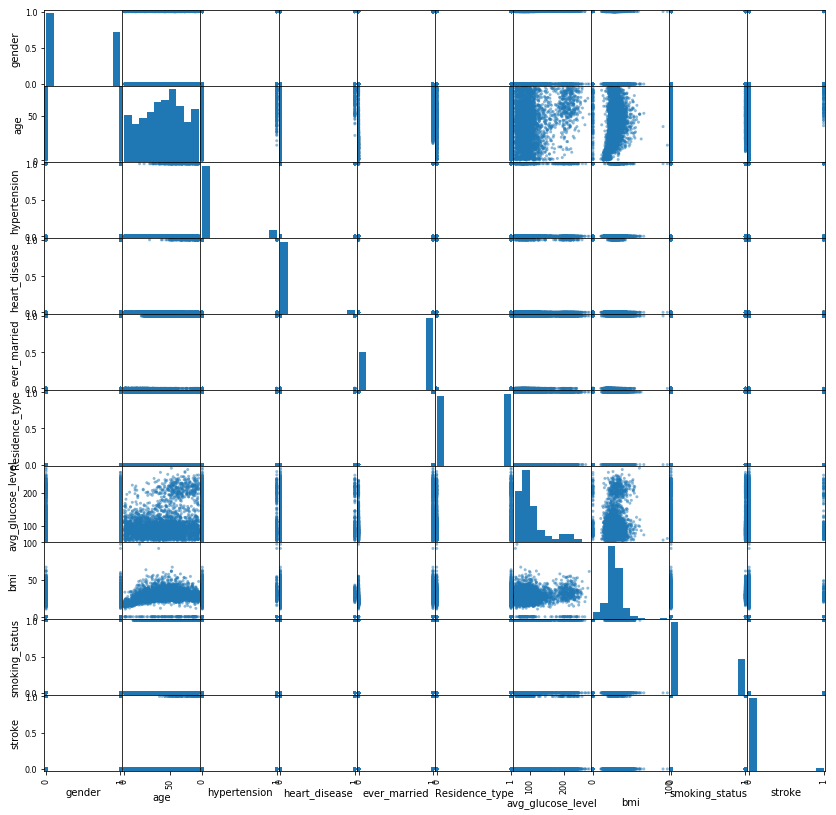

In [7]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
plt.rcParams["figure.figsize"] = (14,14)
scatter_matrix(BPdata)
plt.show()

In [9]:
X = BPdata.iloc[:, 0:9].values  
y = BPdata.iloc[:, 9].values  

In [10]:
import scipy
import sklearn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
validation_size = 0.20
seed=7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=validation_size, random_state=seed)
scoring = 'accuracy'

results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        msg = "%s: %f (%f), %f" % (name, cv_results.mean(), cv_results.std(), accuracy_score(y_test, predictions))
        print(msg)

LR: 0.968949 (0.012283), 0.969325
LDA: 0.960514 (0.012584), 0.964724
KNN: 0.968183 (0.012589), 0.966258
CART: 0.937878 (0.015998), 0.930982
NB: 0.888429 (0.014731), 0.883436
SVM: 0.969332 (0.012701), 0.969325


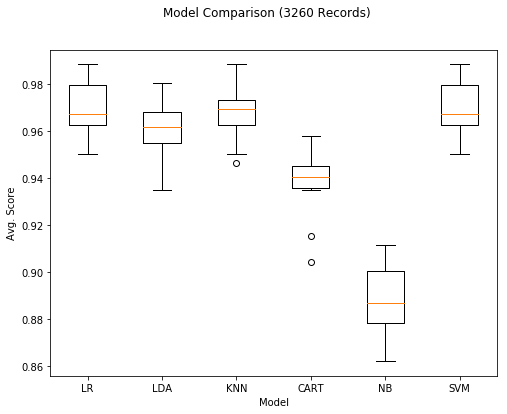

In [11]:
# Compare Algorithms
plt.rcParams["figure.figsize"] = (8,6)
fig = plt.figure()
fig.suptitle('Model Comparison (3260 Records)')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Avg. Score')
plt.xlabel('Model')
ax.set_xticklabels(names)
# plt.grid()
plt.show()
# fig.savefig('stroke3260records.jpg')

In [26]:
# Make predictions using Gaussian on validation dataset
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.969325153374
[[632   0]
 [ 20   0]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       632
          1       0.00      0.00      0.00        20

avg / total       0.94      0.97      0.95       652



c:\users\sitra\anaconda3\envs\pythondata\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
